In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(0,"../src/")

from linear_regression import *
from main import *
from bootstrap import *

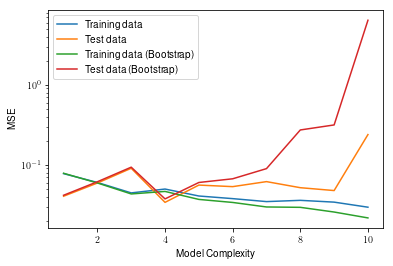

In [10]:
n = 300
degrees = np.arange(1, 11)
MSE_train = np.zeros(len(degrees))
MSE_test = np.zeros(len(degrees))

MSE_train_boot = np.zeros(len(degrees))
MSE_test_boot = np.zeros(len(degrees))

R2_train = np.zeros(len(degrees))
R2_test = np.zeros(len(degrees))

x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + np.random.normal(0, 1, n) * 0.2

scaler = StandardScaler()

for i, deg in enumerate(degrees):
    X = design_matrix_2D(x, y, deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
    
    for X in [X_train, X_test]:
        X = scaler.fit_transform(X)
        X[:, 0] = np.ones(X.shape[0])
    
    beta = OLS_SVD_2D(X_train, z_train)
    MSE_train[i] = MSE(z_train, X_train @ beta)
    MSE_test[i] = MSE(z_test, X_test @ beta)
    
    MSE_train_boot[i], MSE_test_boot[i], _, _ = bootstrap(
        X_train, X_test, z_train, z_test, bootstraps = 100
    )
    
  #  R2_train[i] = R2(z_train, X_train @ beta)
   # R2_test[i] = R2(z_test, X_test @ beta)
    
    #var_b = var_beta(z_train, X_train)

plt.semilogy(degrees, MSE_train, label = "Training data")
plt.semilogy(degrees, MSE_test, label = "Test data")
plt.semilogy(degrees, MSE_train_boot, label = "Training data (Bootstrap)")
plt.semilogy(degrees, MSE_test_boot, label = "Test data (Bootstrap)")
plt.xlabel("Model Complexity")
plt.ylabel("MSE")
plt.legend()

In [ ]:
x = np.array([[1,2], [4, 5]])

plt.matshow(x)
plt.colorbar()
plt.show()

In [ ]:
plt.plot(degrees, R2_train, label = "Training data")
plt.plot(degrees, R2_test, label = "Test data")
plt.xlabel("Model Complexity")
plt.ylabel("R2")
plt.legend()

In [ ]:
print(np.sqrt(var_b)) # for deg = 5
print(beta)

In [ ]:
def k_fold_split(X, z, k_folds = 5):
    perm = np.random.permutation(len(z))
    perm = np.split(perm, k_folds)
    return perm

X =  np.ones([5, 5])
z = np.ones([5])
for i in range(5):
    X[i] *= i
    z[i] *= i